## Import Libraries


In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metaprivBIDS_stat import plot_calc
from metaprivBIDS_stat import rst_outlier_case2

## File from OpenNeuro Import

AOMIC is the raw dataset "Amsterdam Open MRI Collection" taken from OpenNeuro.

In [2]:
AOMIC = 'https://s3.amazonaws.com/openneuro.org/ds003097/participants.tsv?versionId=9gylMj_lF7dOQFiiUSuQ4OeHtgxzGUtv'
AOMIC = pd.read_csv(AOMIC, sep='\t')
AOMIC.to_csv('data_ds003097/AOMIC_dataset_ds003097.csv', sep=',', index=False)

Load in of results calculated using (MetaprivBIDS App)

The selected quasi identifers are:

- education_level
- background_SES
- sex
- handedness
- age
- gender_identity_M
- gender_identity_F
- sexual_attraction_M 
- sexual_attraction_F

selected sensitive attrbutes: 
    
  - gender_identity_M, gender_identity_F, sexual_attraction_M, sexual_attraction_F
 
The dis-score fraction is the default 0.3 & missing values are indicated as NaN.

In [3]:
suda = pd.read_csv('data_ds003097/SUDA_ds003097.csv', sep=',')
pif = pd.read_csv('data_ds003097/PIF_ds003097.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds003097/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds003097/normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds003097/k-combined-all-2-11.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('data_ds003097/normalized_difference_results_non.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})

## Using MetaprivBIDS stats import to calculate Pearson and Spearman correlation on row level.


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.76, P-value: 0.0000
Kendall's Tau between suda & pif: 0.61, p-value: 0.0000
Pearson Correlation between suda & pif: 0.74


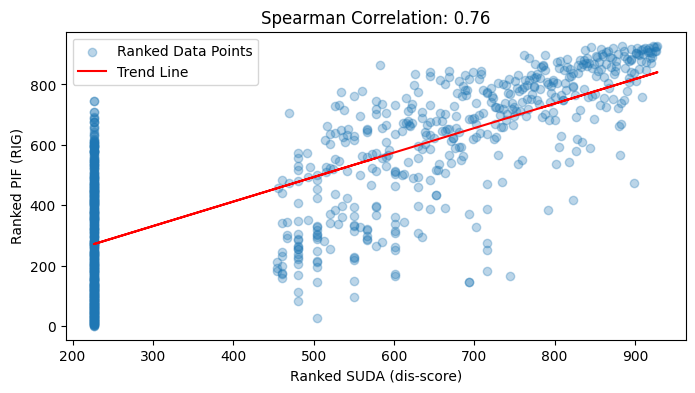

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.72
Pearson Correlation between K-combined & PIF field level: 0.02
Pearson Correlation between SUDA & K-combined field level: -0.56


Spearman Rank Correlation between PIF & SUDA: 0.72, P-value: 0.0298
Spearman Rank Correlation between PIF & K: -0.28, P-value: 0.4581
Spearman Rank Correlation between SUDA & K: -0.54, P-value: 0.1301


In [4]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

## Iterating through all possible combination of variables & calculating the correlation between SUDA, K-Global and PIF


In [5]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, AOMIC, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: -0.57
Pearson Correlation between Suda sum and K-combined: -0.16


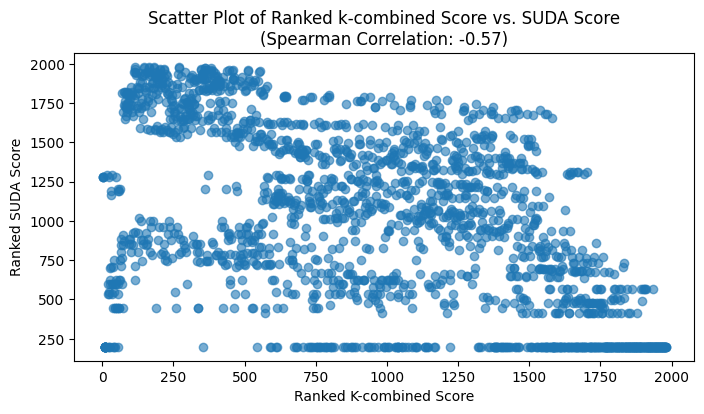

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: -0.59
Pearson Correlation between PIF 95% and K-combined: -0.25


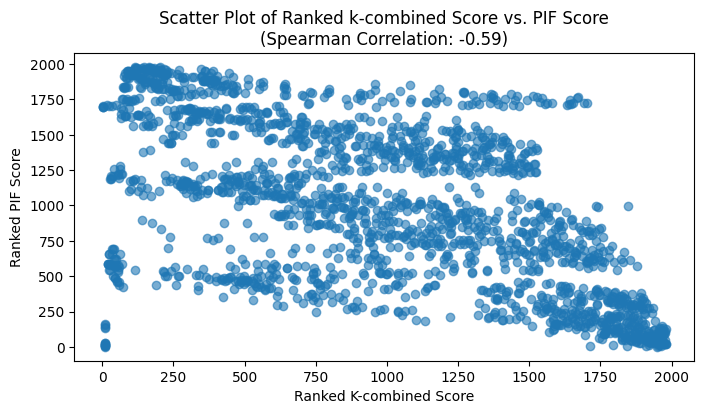

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.91
Pearson Correlation between PIF 95% and SUDA: 0.83


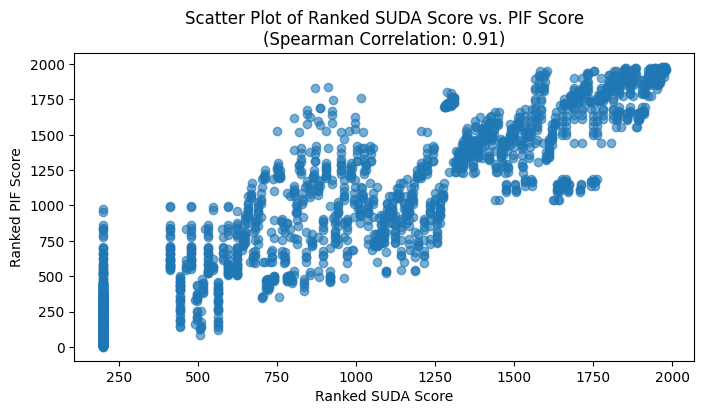

In [6]:
plot_calc(sum_score_df)

## T-test between risky and non-risky k-global values for variables. 

### Non risky variables

In [75]:
k_combined_field_non_risk

,variable,Normalized Difference
0,BAS_reward,0.0
1,BAS_drive,0.0
2,BAS_fun,0.0
3,BIS,0.0
4,BMI,0.0
5,IST_fluid,0.0
6,IST_crystallised,0.0
7,STAI_T,0.0
8,IST_memory,0.0
9,NEO_O,0.0


### Risk variables 

In [333]:
k_combined_field

,variable,Normalized Difference
0,education_level,42.7
1,background_SES,41.8
2,sex,34.0
3,handedness,18.5
4,age,18.3
5,gender_identity_M,2.4
6,gender_identity_F,1.0
7,sexual_attraction_M,0.3
8,sexual_attraction_F,0.3


## Result of Paired T-test

In [30]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
print('Mean, risk identifiers:',mean_risk_values)

Mean, risk identifiers: 17.700000000000003


In [31]:
mean_risk_values = (k_combined_field_non_risk['Normalized Difference']).mean()
print('Mean, non-risk identifiers:',mean_risk_values)

Mean, non-risk identifiers: 0.0


In [38]:
t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])
print('t:',t,'p-value:', p)

t: 4.258779838413848 p-value: 0.00025430539773541554


### PIF & SUDA Outliers 

In [18]:
#SUDA
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')

In [20]:
print(len(above_outlier_indices))

434


In [21]:
#PIF
class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

6


In [362]:
AOMIC.loc[338]

participant_id            sub-0339
age                          22.75
sex                         female
handedness                   right
BMI                             27
education_level               high
background_SES                 6.0
IST_fluid                    138.0
IST_memory                    61.0
IST_crystallised              46.0
IST_intelligence_total       245.0
BAS_drive                       15
BAS_fun                         14
BAS_reward                      19
BIS                             17
NEO_N                           32
NEO_E                           45
NEO_O                           40
NEO_A                           40
NEO_C                         32.0
STAI_T                        31.0
sexual_attraction_M            3.0
sexual_attraction_F            6.0
gender_identity_M              3.0
gender_identity_F              4.0
religious_upbringing            no
religious_now                   no
religious_importance           NaN
DWI_TR_run1         

## Improving Risk
These dataset have been improved in metaprivBIDS app and the resulting suda and pif results have been saved in improved csv files. 

In [22]:
suda_improved = pd.read_csv('data_ds003097/improved_suda.csv', sep=',')
pif_improved = pd.read_csv('data_ds003097/improved_PIF.csv', sep=',',index_col='Unnamed: 0').sort_index()

### New outlier detection

In [35]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda_improved, 'dis-score')
print(len(above_outlier_indices))

84


In [36]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif_improved, 'RIG')
print(len(above_outlier_indices))

18
